# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [2]:
model = Word2Vec.load('Data/w2v.model')

In [3]:
inferred_vector = model.wv.most_similar('lemon chicken garlic onion'.split(), topn=20)
inferred_vector

[('shallot', 0.6585192084312439),
 ('shallots', 0.6159201860427856),
 ('onions', 0.548940896987915),
 ('scallions', 0.5399220585823059),
 ('camphor', 0.509620726108551),
 ('oregano', 0.5023354887962341),
 ('curry', 0.4905508756637573),
 ('tomato', 0.4837029278278351),
 ('chile', 0.48241376876831055),
 ('pepper', 0.481892466545105),
 ('thyme', 0.4789288341999054),
 ('chili', 0.4683789312839508),
 ('parsley', 0.4667717218399048),
 ('cumin', 0.465359091758728),
 ('tomatoes', 0.4570711851119995),
 ('lime', 0.45315617322921753),
 ('marjoram', 0.45168212056159973),
 ('fennel', 0.448289155960083),
 ('jalapeño', 0.44708752632141113),
 ('leek', 0.4469062089920044)]

In [4]:
with open('Data/items_for_sale.txt') as f:
    items_for_sale = f.read().split('\n')

In [5]:
words, vectors = [], []
for item in items_for_sale:
    try:
        words.append(item)
        vectors.append(model.wv.get_vector(item))
    except KeyError:
        print(f'Word {item} not found in model!')

In [6]:
sims = cosine_similarity(vectors, vectors)

In [7]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [10]:
k = 20
indices = list(range(len(vectors)))
random.shuffle(indices)
indices = indices[120:120+k]

small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

small_sims = cosine_similarity(small_vectors, small_vectors)

for x in range(len(small_sims)):
    small_sims[x, x] = 0

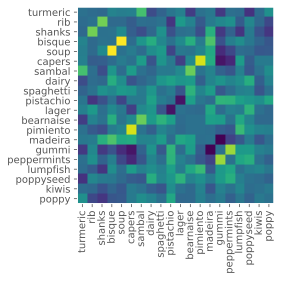

In [12]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.savefig('plot2.png', dpi=300)
plt.show()

In [ ]:
np.savetxt('Data/words.txt', words, fmt='%s')
np.save('Data/vectors.npy', vectors)